In [2]:
#Epsilon Greedy Algo
import numpy as np
import matplotlib.pyplot as plt
import sys

In [12]:
class Bandits:
    # for the sake of simplicity the rewards are drawn from Uniforms and normals
    def __init__(self):
        #fixed set of arms 
        self.reward_details = {'N_arms': 5,
                              'distr': ['uniform', 'uniform', 'uniform', 'normal', 'normal'],
                              'params': [(0., 1.), (-1., 2), (1, 2), (0, 1), (1.5, 2)],
                             }
        self.Q_t = np.zeros(5)
        self.N_t = np.zeros(5)
        self.alpha = 1e-3
        self.eps = 0.1
        self.avg_reward = [0]
    
    def get_optimal_reward(self): #Calculates the theoretical optimal reward (the best possible expected reward from all arms).
        max_reward = -np.inf
        for i in range(self.reward_details['N_arms']):
            if self.reward_details['distr'][i] == 'uniform':
                r = (self.reward_details['params'][i][1] - self.reward_details['params'][i][0])/2.0
            elif self.reward_details['distr'][i] == 'normal':
                r = self.reward_details['params'][i][0]
            else:
                print("The reward function is not defined. Exiting!")
                sys.exit()
            if r > max_reward:
                max_reward = r
        return max_reward
    
    def plot_Bandits_learning(self):
        # plots the action
        plt.bar(np.arange(self.reward_details['N_arms']), self.N_t)
        plt.xlabel('Action')
        plt.ylabel('# selections')
        plt.title('Action selection Distribution')
        # plt.close()

        # plots the average reward at every step
        plt.figure()
        #optimal reward - in this case
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward)
        #plt.plot(np.arange(len(self.avg_reward)), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        #plt.plot(np.arange(len(self.avg_reward)), self.avg_reward)
        #Log graph has better visualisation
        plt.xlabel('Number of Steps (log scale)')
        plt.ylabel('Average Reward')
        plt.title('Learning Curve for Bandits Agent')
        plt.legend()   
        # plt.close()
  
    
    def take_action_epsilon_greedy(self):#2nd
        if np.random.rand() <= self.eps:
            a_t = np.random.choice(self.reward_details['N_arms'])
        else: 
            a_t = np.argmax(self.Q_t)  # select the best action
        
        self.N_t[a_t] += 1
        return a_t
    
    def observe_reward(self, a_t):#Samples a reward from the selected arm’s distribution using the `sample_reward` function.
        # return the estimate of r_t #3
        r_t = sample_reward(self.reward_details['distr'][a_t], self.reward_details['params'][a_t])
        return r_t
        
    def update_Q(self, a_t, r_t): #4 only for the one chhanged
        #get the estimate for Q_t+1
        self.Q_t[a_t] = self.Q_t[a_t] + (r_t - self.Q_t[a_t])/self.N_t[a_t]
    
    def learn(self, N_steps=100_000):  #1st 
        for i in range(N_steps):
            a_t = self.take_action_epsilon_greedy()   
            r_t = self.observe_reward(a_t)
            self.update_Q(a_t, r_t)
            # keep track of the average reward
            temp_avg_reward = self.avg_reward[-1] + (r_t - self.avg_reward[-1])/(i+1)#last
            self.avg_reward.append(temp_avg_reward)


In [3]:
def sample_reward(distr, params):
    if distr == 'uniform':
        return np.random.uniform(params[0], params[1])
    elif distr == 'normal':
        return np.random.normal(params[0], np.sqrt(params[1]))
    else:
        print("The reward function is not defined. Exiting!")
        sys.exit()

**Plot the learning curves**

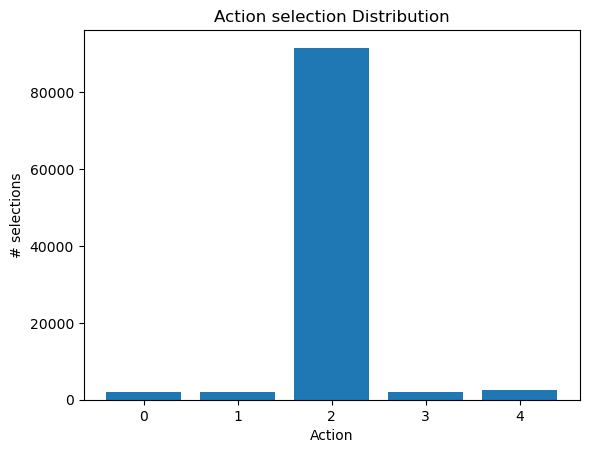

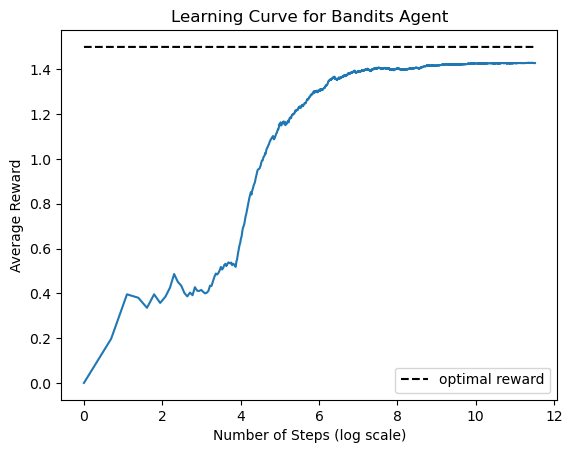

In [16]:
bandits_obj = Bandits()
bandits_obj.learn()
bandits_obj.plot_Bandits_learning()

___

#### Plot Details
The first line plots the optimal reward as a reference.
The second line plots the agent's actual average reward over time.
Both are plotted against the number of steps (on a log scale) to visualize learning progress and compare it to the best possible outcome.

___

### Epsilon - Greedy 

The `Bandits` class implements a multi-armed bandit agent using the epsilon-greedy algorithm . Here’s a breakdown of its main components and functionality:

### Initialization (`__init__`)
- **Arms:** 5 arms, each with a reward distribution (uniform or normal) and parameters.
- **Q_t:** Estimated value (mean reward) for each arm, initialized to zero.
- **N_t:** Number of times each arm has been selected.
- **alpha:** Learning rate (not used in the current update rule).
- **eps:** Epsilon value for epsilon-greedy (probability of exploring).
- **avg_reward:** Tracks the running average of rewards.

### Methods

#### `get_optimal_reward()`
Calculates the theoretical optimal reward (the best possible expected reward from all arms).

#### `plot_Bandits_learning()`
Plots:
- The number of times each arm was selected.
- The learning curve (average reward over time, compared to the optimal reward).

#### `plot_Bandits_learning_compare(all_curves, cs)`
Plots learning curves for different parameter settings (e.g., different UCB constants).

#### `take_action_epsilon_greedy()`
Implements epsilon-greedy action selection:
- With probability `eps`, selects a random arm (exploration).
- Otherwise, selects the arm with the highest estimated value (exploitation).
- Updates the count for the selected arm.

#### `observe_reward(a_t)`
Samples a reward from the selected arm’s distribution using the `sample_reward` function.

#### `update_Q(a_t, r_t)`
Updates the estimated value for the selected arm using the incremental mean formula.

#### `learn( N_steps=100_000)`
Runs the learning process for a specified number of steps:
- Selects an action (epsilon-greedy or UCB, if implemented).
- Observes the reward.
- Updates the value estimate.
- Updates the running average reward.

---

**Summary:**  
The class simulates a multi-armed bandit problem, allowing you to experiment with different exploration strategies and visualize the agent’s learning progress.